### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


### Reading the Dataset

In [3]:
data = pd.read_csv("wwwusage.csv")

### Creating Training & Test Dataset

In [4]:
size = int(len(data) * 0.80)
train, test = data[0:size], data[size:len(data)]

### Building Model

In [5]:
model = ARIMA(train, order = (1, 2, 3))
fitted_model = model.fit()

In [6]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   80
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -201.876
Date:                Thu, 18 Jan 2024   AIC                            413.752
Time:                        01:49:39   BIC                            425.535
Sample:                             0   HQIC                           418.469
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2476      0.399     -0.620      0.535      -1.030       0.535
ma.L1          0.4652      0.385      1.209      0.227      -0.289       1.220
ma.L2         -0.3124      0.108     -2.883      0.0

### Forecasting

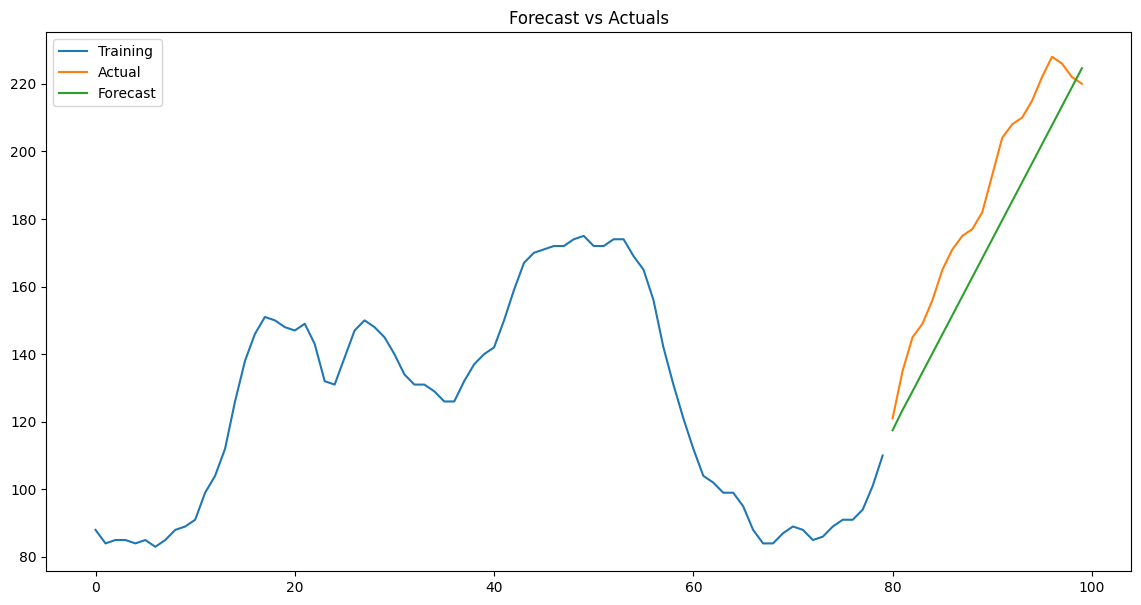

In [7]:
forecast = fitted_model.forecast(len(test), 0.05) # 95% confidence
forecast = pd.Series(forecast, index = test.index)

plt.figure(figsize = (14, 7))
plt.plot(train, label = "Training")
plt.plot(test, label = "Actual")
plt.plot(forecast, label = "Forecast")
plt.title("Forecast vs Actuals")
plt.legend()
plt.show()